In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys, os, time, math
import string, ast 
from datetime import date
import seaborn as sns
from scipy.stats import gaussian_kde
import pandas as pd

In [2]:
tmSet = ['OSM1','EGF1','EGF+TGFB1','TGFB1','PBS1', 
         'OSM2','EGF2','EGF+TGFB2','TGFB2','PBS2',
         'OSM+EGF+TGFB','OSM+EGF','OSM+TGFB']
n_conditions = len(tmSet) # Total number of Ligand Conditions
today = date.today()
date2day = today.strftime("%b%d-%Y")
sysName = 'LI204601_P'
trajl = 40
figid = sysName+'_tlen'+str(trajl)+'_'+date2day

Plot CC Values of The First Frames of Trajectory Snippets Mapped on Microstates

In [3]:
# Import CC values for conditions & microstates
filename = 'ccTrjsDcomp_MicStatesLI204601_P_tl40AllWells_Apr16-2024.npz'
file_path = '/home/groups/ZuckermanLab/jalim/LI204601_INCUCYTE/decomposeCCtraj_macrostates/'
file_info = file_path + filename
if file_info:
   # Loading the saved data of CC values of conditions & microstates 
   data = np.load(file_info, allow_pickle=True)
   cc_values_by_microstate = data['cc_vals_by_microstate'].item()

In [60]:
for condition, microstate_data in cc_values_by_microstate.items():
    microstate_indices = []
    cc_values = []

    # Collect all microstates and their corresponding CC values
    for microstate, values in microstate_data.items():
        microstate_indices.extend([microstate + 1] * len(values))  # Assuming microstate indices are 0-based initially
        cc_values.extend(values)

    # Create a data frame for the current condition
    data_micro = pd.DataFrame({
        'Microstate': microstate_indices,
        'CC Values': cc_values
    })

    # Plotting
    plt.figure(figsize=(25, 15))
    ax = sns.violinplot(x='Microstate', y='CC Values', data=data_micro, scale='width', inner='quartile')
    plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility

    # Using x-tick labels to annotate each violin
    for label in ax.get_xticklabels():  # Get all x-tick labels, which correspond to the microstates
        x = label.get_position()[0]
        # Finding the maximum y-value for each violin using its x-position
        y_data = data_micro[data_micro['Microstate'] == int(label.get_text())]['CC Values']
        y_max = y_data.max()
        plt.text(x, y_max, label.get_text(), ha='center', va='bottom', fontsize=8, color='black')

    plt.title(f'Distribution of CC Values Across Microstates: {tmSet[condition]}')
    plt.xlabel('Microstates')
    plt.ylabel('CC Values')
    plt.tight_layout()
    #plt.show()
    plt.savefig(f'CC_valuesByMicrostatesLabels_{tmSet[condition]}.png', dpi=500, bbox_inches='tight')
    plt.close()

In [61]:
data_micro.loc[ data_micro['Microstate'] == 178 ]

,Microstate,CC Values
11929,178,0.834306
11930,178,0.902371
11931,178,0.924645
11932,178,0.914170
11933,178,0.913138
11934,178,0.881712
11935,178,0.912136
11936,178,0.901063
11937,178,0.892542
11938,178,0.910444


In [62]:
data_micro.loc[ data_micro['Microstate'] == 179 ]

,Microstate,CC Values
11950,179,0.572854
11951,179,0.547297
11952,179,0.693305
11953,179,0.761906
11954,179,0.724365
11955,179,0.743601


In [48]:
# Loop through each condition 
for condition, microstate_data in cc_values_by_microstate.items():
    microstate_indices = []
    cc_values = []

    # Collect all microstates and their corresponding CC values
    for microstate, values in microstate_data.items():
        microstate_indices.extend([microstate+1] * len(values))
        cc_values.extend(values)

    # Create a data frame for the current condition
    data_micro = pd.DataFrame({
        'Microstate': microstate_indices,
        'CC Values': cc_values
    })

    # Plotting
    plt.figure(figsize=(25, 15))
    sns.violinplot(x='Microstate', y='CC Values', data=data_micro, scale='width', inner='quartile')
    plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
    plt.title(f'Distribution of CC Values Across Microstates: {tmSet[condition]}')
    plt.xlabel('Microstates')
    plt.ylabel('CC Values')
    plt.tight_layout()
    #plt.show()
    plt.savefig(f'CC_valuesByMicrostates_{tmSet[condition]}.png', dpi=500, bbox_inches='tight')
    plt.close()

In [27]:
CC_micro = []
for ind_micro in range(200):
    num_cc_vals = data_micro.loc[ data_micro['Microstate'] == ind_micro+1 ].size
    if num_cc_vals < 30:
       CC_micro.append(ind_micro+1)
print(f"Narrow distribution of CC values in Microstates: {CC_micro}")

Narrow distribution of CC values in Microstates: [5, 8, 11, 20, 22, 24, 27, 31, 34, 36, 40, 47, 57, 59, 69, 78, 79, 84, 88, 90, 91, 94, 97, 104, 107, 109, 113, 115, 118, 122, 124, 128, 130, 135, 142, 143, 151, 152, 154, 163, 168, 169, 179, 183, 190, 191, 193]


In [36]:
from matplotlib.ticker import MultipleLocator, AutoMinorLocator  # Import both locators

all_data = [] # Initialize a list to store data from all conditions

# Collect data from each condition
for condition, microstate_data in cc_values_by_microstate.items():
    for microstate, values in microstate_data.items():
        for value in values:
            all_data.append({'Microstate': microstate, 'CC Values': value}) # Append as a Dictionary 

all_data_df = pd.DataFrame(all_data) # Convert collected data into a DataFrame

# Group by microstate and calculate mean and standard deviation
stats_df = all_data_df.groupby('Microstate')['CC Values'].agg(['mean', 'std']).reset_index()

plt.figure(figsize=(15, 10))
ax = plt.gca()  # Get the current axis

# Plot error bars for mean and standard deviation
ax.errorbar(x=stats_df['Microstate'], y=stats_df['mean'], yerr=stats_df['std'], fmt='o', capsize=3, label='Mean ± SD')
ax.set_xlabel('Microstates')
ax.set_ylabel('CC Values')

# Create a secondary axis for the KDE plot
ax2 = ax.twinx()
# Rotate the KDE plot by transposing the axes
sns.kdeplot(y=stats_df['mean'], color='red', ax=ax2, label = 'KDE')
ax2.set_ylabel('Density')

plt.title('Mean ± SD and KDE of CC Values Across All Conditions for Each Microstate')

tick_interval = 5
xticks = range(0, len(stats_df['Microstate']), tick_interval)
xticklabels = stats_df['Microstate'][::tick_interval]
plt.xticks(ticks=xticks, labels=xticklabels, rotation=0)
plt.legend(loc='upper left')
grid_interval = 10
ax.xaxis.set_major_locator(MultipleLocator(grid_interval))  # Set major tick locator
ax.xaxis.set_minor_locator(AutoMinorLocator(2))  # Set minor tick locator to show 2 minor ticks between major ticks
ax.grid(True)  # Enable major grid
ax.grid(which='minor', linestyle=':', linewidth='0.1')  # Enable minor grid with a different style
plt.xlim([-1, 200])
plt.tight_layout()
#plt.show()
plt.savefig('MeanSD_KDE_CC_valuesByMicrostates.png', dpi=400, bbox_inches='tight')
plt.close()

/home/groups/ZuckermanLab/jalim/instalLocal/anaconda3/envs/celltraj/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


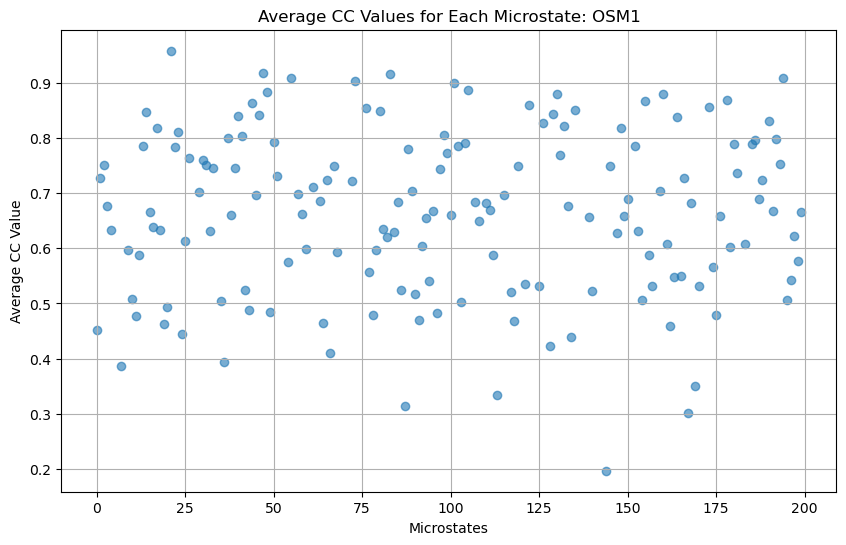

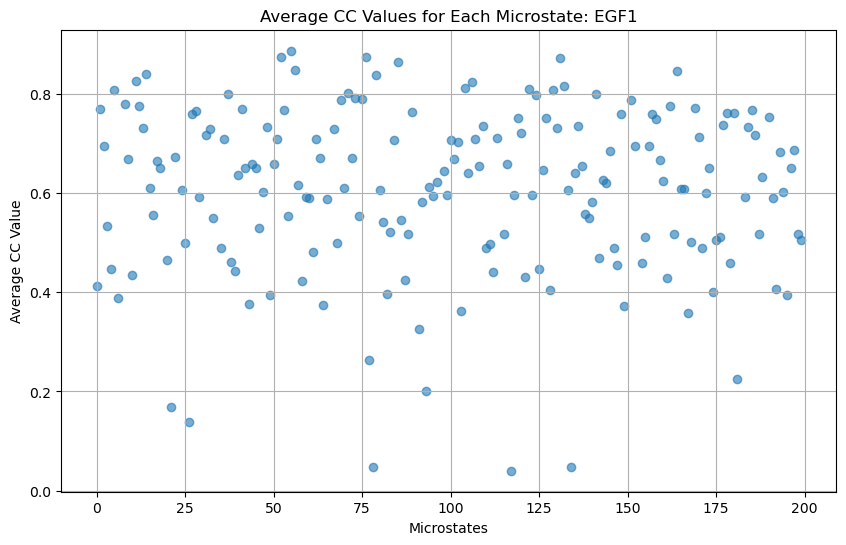

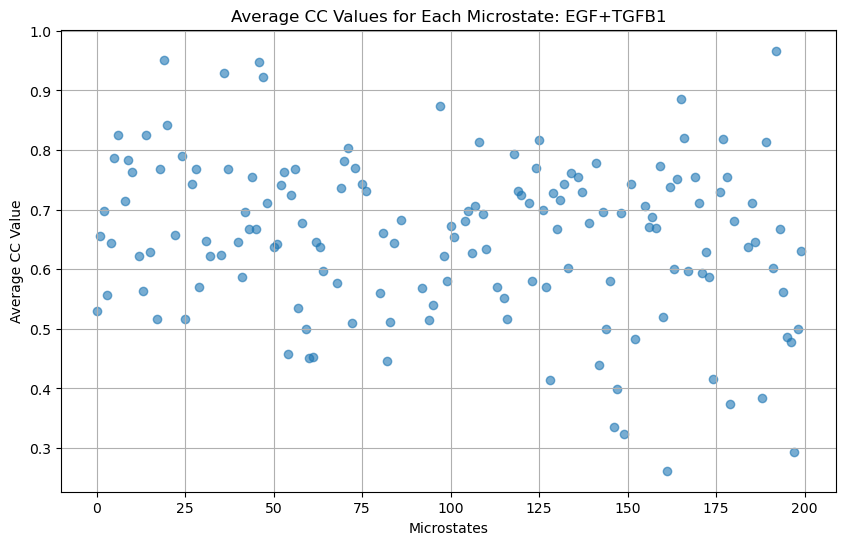

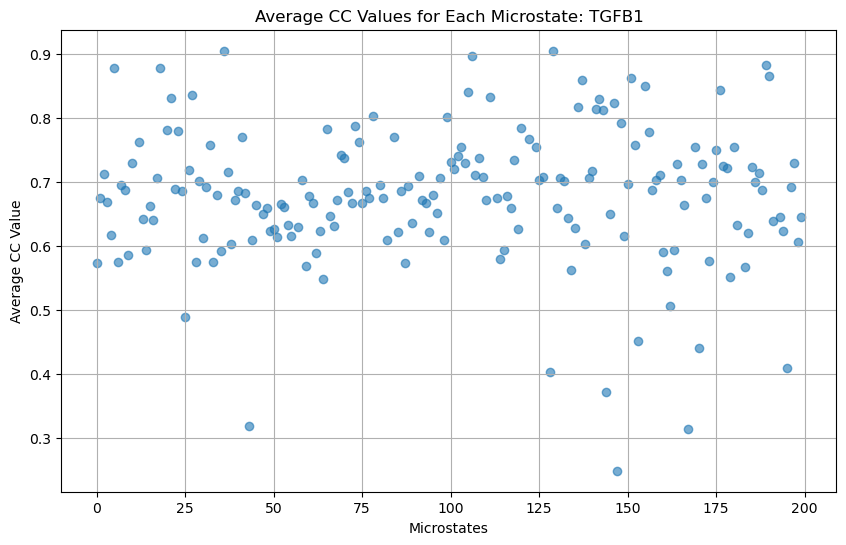

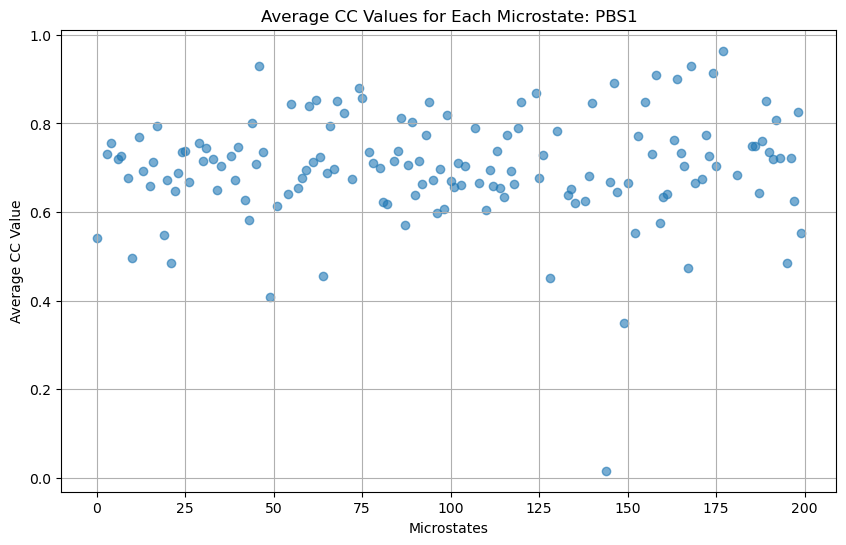

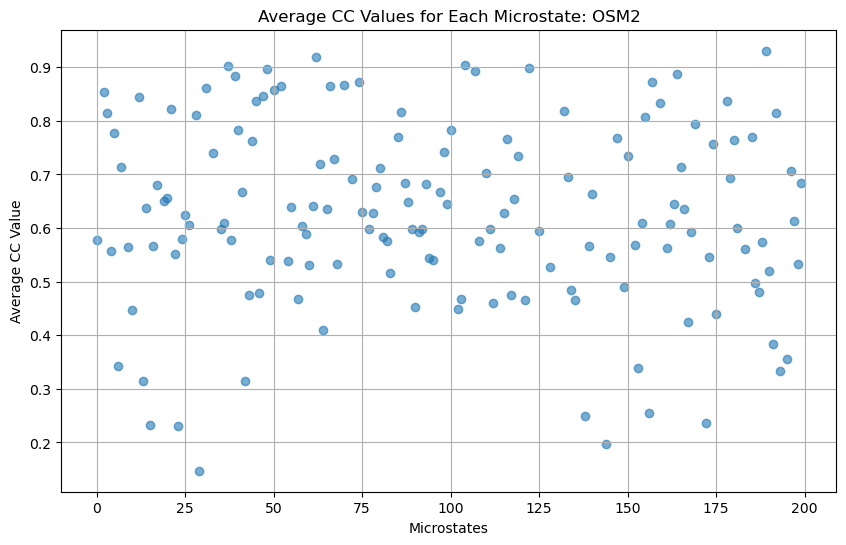

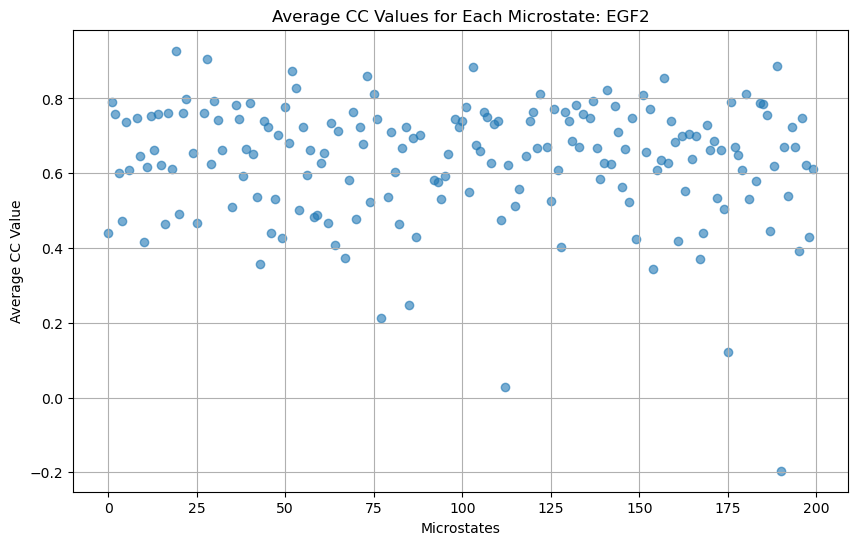

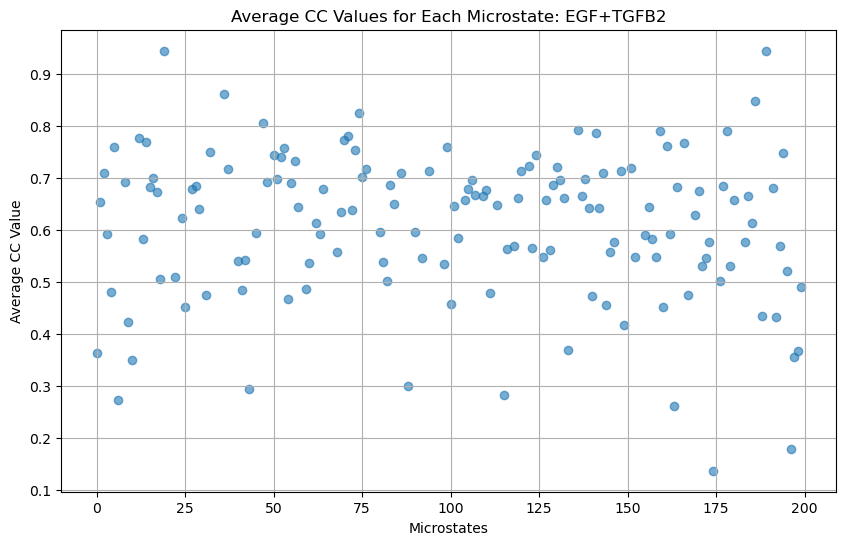

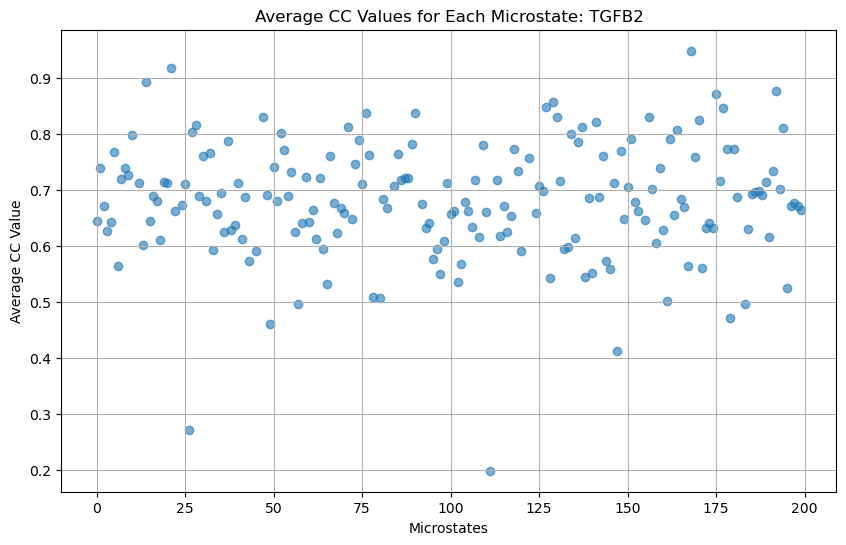

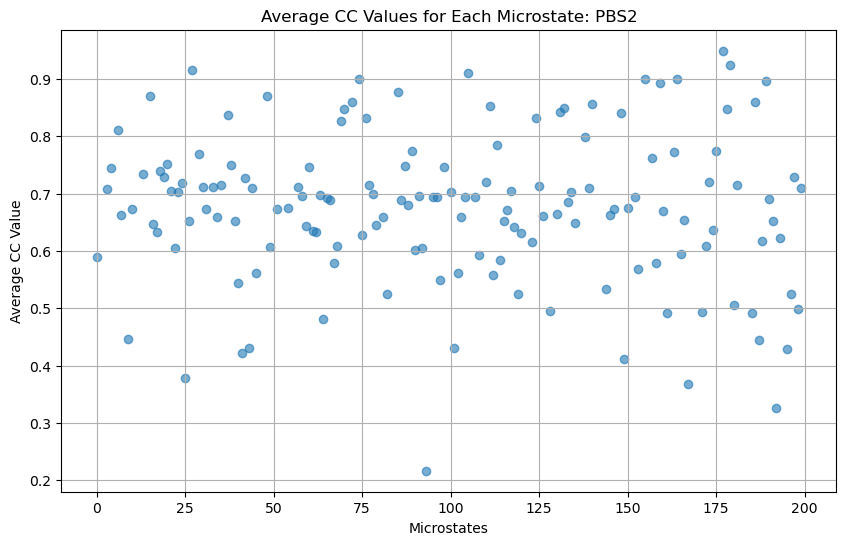

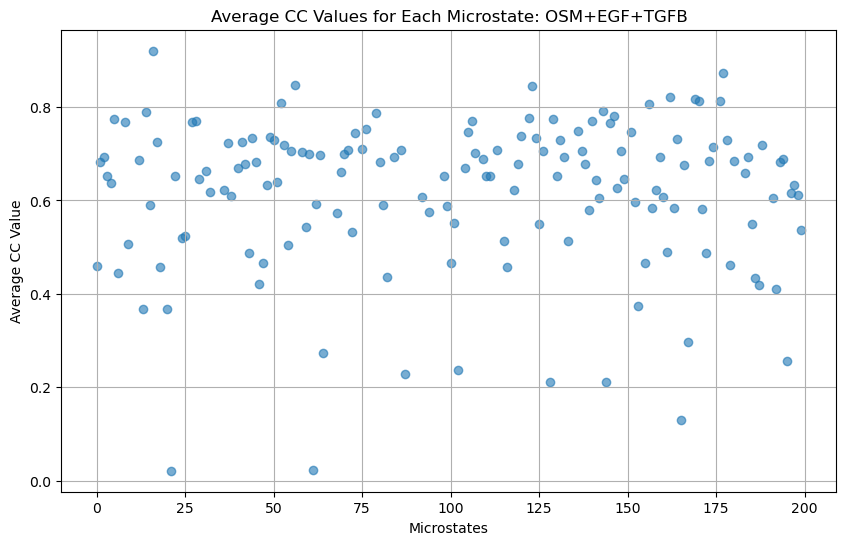

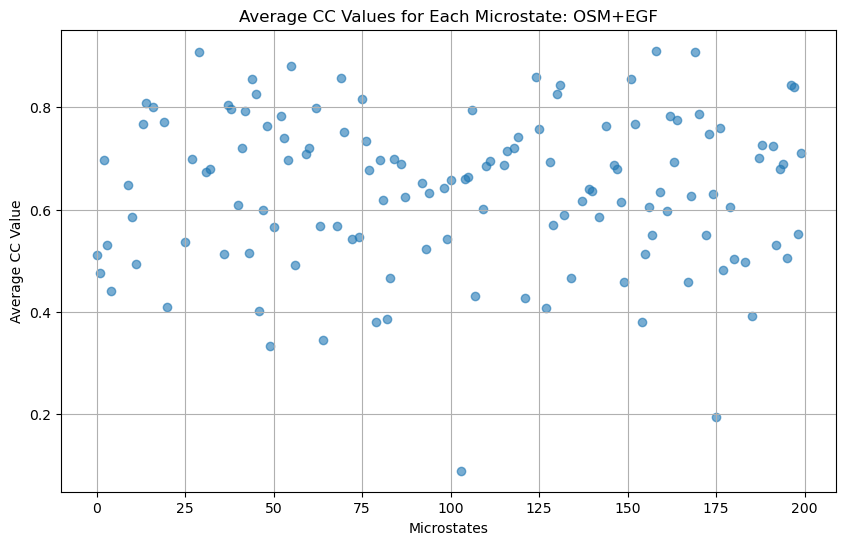

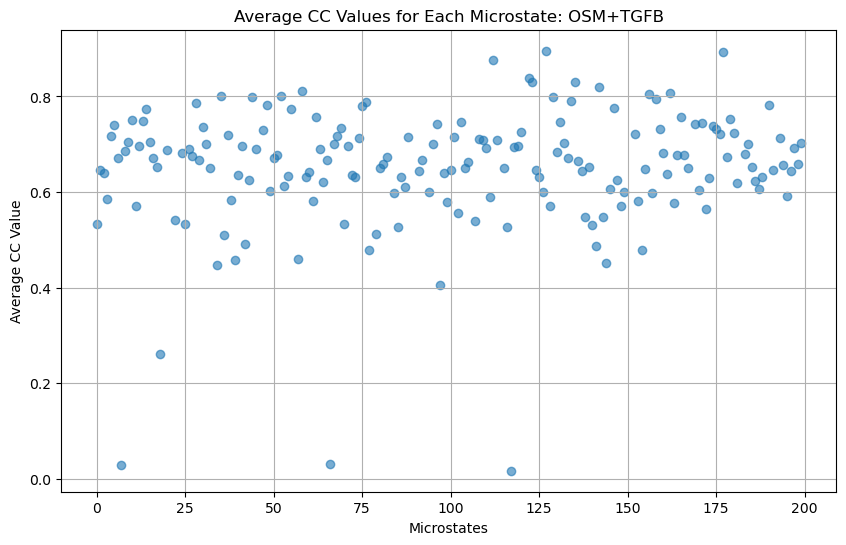

In [7]:
# Loop through each condition contained in the loaded data
for condition, microstate_data in cc_values_by_microstate.items():
    microstate_indices = []
    cc_values = []

    # Collect all microstates and their corresponding CC values
    for microstate, values in microstate_data.items():
        microstate_indices.extend([microstate] * len(values))
        cc_values.extend(values)

    # Create a DataFrame for the current condition
    data_micro = pd.DataFrame({
        'Microstate': microstate_indices,
        'CC Values': cc_values
    })

    # Generate violin plot
    plt.figure(figsize=(25, 15))
    sns.violinplot(x='Microstate', y='CC Values', data=data_micro, scale='width', inner='quartile')
    plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
    plt.title(f'Distribution of CC Values Across Microstates: {tmSet[condition]}')
    plt.xlabel('Microstates')
    plt.ylabel('CC Values')
    plt.tight_layout()
    plt.show()
    #plt.savefig(f'CC_valuesByMicrostates_{condition}.png', dpi=300, bbox_inches='tight')
    #plt.close()

    # Compute the average CC value for each microstate
    average_data = data_micro.groupby('Microstate')['CC Values'].mean().reset_index()

    # Plotting the average CC values as a scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(average_data['Microstate'], average_data['CC Values'], alpha=0.6)
    plt.title('Average CC Values for Each Microstate: ' + str(tmSet[condition]))
    plt.xlabel('Microstates')
    plt.ylabel('Average CC Value')
    plt.grid(True)
    plt.show()
    #plt.savefig(f'avgCC_valuesByMicrostates_{condition}.png', dpi=400, bbox_inches='tight')
    #plt.close()